In [75]:
# we import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

In [76]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [77]:
n, height, width = lfw_dataset.images.shape
#height and width represents dimensions of 1 image and n is total number of sample images
print("The height of each image is:")
print(height)
print("The width of each image is:")
print(width)
print("The number of input features are")
print(height*width)
print("The number of input images (number of labelled examples) are:")
print(n)

The height of each image is:
62
The width of each image is:
47
The number of input features are
2914
The number of input images (number of labelled examples) are:
1140


In [78]:
x = lfw_dataset.data
y = lfw_dataset.target

print("The size of input data is")
print(x.shape)
n_feature = x.shape[1]
print("The size of labelled output data is")
print(y.shape)

classes = lfw_dataset.target_names
n_classes = classes.shape

print("The classes i.e. names of people in the dataset are")
print(classes)
print("The number of classes")
print(n_classes)

The size of input data is
(1140, 2914)
The size of labelled output data is
(1140,)
The classes i.e. names of people in the dataset are
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
The number of classes
(5,)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print("Size of training data:")
print(x_train.shape)
#x_train should be 70% in size, of original input x

Size of training data:
(798, 2914)


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(x_train)
x_train_new = pca.transform(x_train)
x_test_new = pca.transform(x_test)

print("The size of input data after applying PCA:")
print(x_train_new.shape)
#The number of features must have reduced to 100

The size of input data after applying PCA:
(798, 100)


In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
x_train_tsne = tsne.fit_transform(x_train_new)
x_test_tsne = tsne.fit_transform(x_test_new)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 798 samples in 0.011s...
[t-SNE] Computed neighbors for 798 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 798 / 798
[t-SNE] Mean sigma: 592.997260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.013916
[t-SNE] KL divergence after 300 iterations: 1.592301
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 342 samples in 0.003s...
[t-SNE] Computed neighbors for 342 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 342 / 342
[t-SNE] Mean sigma: 731.609228
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.278931
[t-SNE] KL divergence after 300 iterations: 1.183968


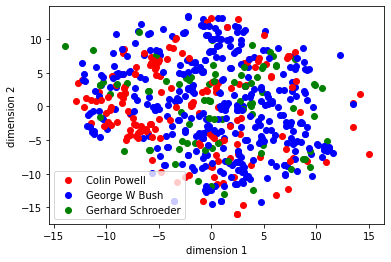

In [82]:
for i in range(0, 798):
  if y_train[i] == 0:
    plt.scatter(x_train_tsne[i][0], x_train_tsne[i][1], color = 'red')
  elif y_train[i] == 2:
    plt.scatter(x_train_tsne[i][0], x_train_tsne[i][1], color = 'blue')
  elif y_train[i] == 3:
    plt.scatter(x_train_tsne[i][0], x_train_tsne[i][1], color = 'green')
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.scatter(x_train_tsne[0][0], x_train_tsne[0][1], color = 'red', label = 'Colin Powell')
plt.scatter(x_train_tsne[0][0], x_train_tsne[0][1], color = 'blue', label = 'George W Bush')
plt.scatter(x_train_tsne[0][0], x_train_tsne[0][1], color = 'green', label = 'Gerhard Schroeder')
plt.legend()

In [83]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_new, y_train)
#we give input as transformed matrix in the eigenspace (matrix genearted in PCA)

predicted = model.predict(x_test_new)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        70
           1       0.58      0.35      0.44        40
           2       0.67      0.87      0.76       159
           3       0.31      0.15      0.20        27
           4       0.67      0.22      0.33        46

    accuracy                           0.64       342
   macro avg       0.57      0.47      0.48       342
weighted avg       0.62      0.64      0.60       342



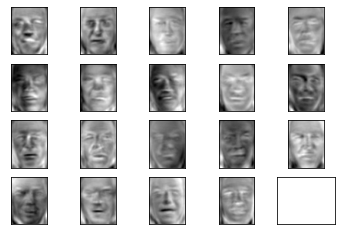

In [103]:
#here we will generate eigenfaces

pca2 = PCA(n_components=100)
pca2.fit(x)
ak = np.dot(x_train_new, pca2.components_)

for i in range(0,20):
  plt.imshow(ak[i].reshape((height, width)), cmap=plt.cm.gray)
  plt.subplot(4,5,i+1)
  plt.xticks(())
  plt.yticks(())


In [107]:
pca.explained_variance_ratio_.sum()

0.9235462

In [109]:
ans = 0
for f in range(0,100):
  pca3 = PCA(n_components=f)
  pca3.fit(x)
  if pca3.explained_variance_ratio_.sum() >= 0.8:
    ans = f
    break

ans

32

In [114]:
pca4 = PCA(n_components=32)
pca4.fit(x_train)

x_train_new2 = pca4.transform(x_train)
x_test_new2 = pca4.transform(x_test)

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train_new2, y_train)

predicted2 = model2.predict(x_test_new2)
print(metrics.classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       0.51      0.71      0.60        70
           1       0.44      0.30      0.36        40
           2       0.67      0.81      0.73       159
           3       0.11      0.04      0.06        27
           4       0.47      0.17      0.25        46

    accuracy                           0.58       342
   macro avg       0.44      0.41      0.40       342
weighted avg       0.54      0.58      0.54       342

